In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
import sys
from pathlib import Path

# Get the parent directory and add it to sys.path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

from data_builder import TimeSeriesBuilder, read_trans, read_labels
from utils import read_data
from models import Model
import torch
import matplotlib.pyplot as plt
from training import test

In [4]:
# load transcripts and cell types
folder = '../../Xenium/BreastS1R1/'
gene = 'GATA3'
transcripts = read_trans(folder + 'MoleculesPerGene/' + gene + '.csv')
cell_types = read_labels(filename=folder + 'Cell_Barcode_Type_Matrices.xlsx', sheet='Xenium R1 Fig1-5 (supervised)')

In [63]:
# Build time series
save_path = folder + 'TimeSeries/'
tsb = TimeSeriesBuilder(transcripts, cell_types)
tsb.run(num_samples=10000, save_path=save_path, gene=gene)

Building cell dictionaries
Find spatial neighbors
Build cell feature vectors
Calculate random walk transition probabilities


/home/xiao/Projects/SpatialDynamics/SpatialDynamics/data_builder.py:42: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_list.append(stats.ks_2samp(sub_base, sub_neighbor).statistic)


Start building the dataset


100%|██████████| 10000/10000 [00:01<00:00, 6747.66it/s]


10000 time-series samples generated


In [32]:
data_folder = folder + 'TimeSeries/'
model_folder = folder + 'Models/'
!python ../main.py -data_path {data_folder}'GATA3_data.csv' -locs_path {data_folder}'GATA3_locs.csv' -save_model_path {model_folder}

(9999, 20, 10)
Epoch [1/100], Loss1: 3.8550, Loss2: 0.2059, Loss3: 0.0376
Epoch [2/100], Loss1: 3.3052, Loss2: 0.1987, Loss3: 0.1489
Epoch [3/100], Loss1: 3.5885, Loss2: 0.3621, Loss3: 0.2085
Epoch [4/100], Loss1: 3.6521, Loss2: 0.5374, Loss3: 0.2330
Epoch [5/100], Loss1: 2.9937, Loss2: 0.6386, Loss3: 0.2873
Epoch [6/100], Loss1: 2.8935, Loss2: 0.6865, Loss3: 0.3919
Epoch [7/100], Loss1: 2.9001, Loss2: 0.6505, Loss3: 0.4267
Epoch [8/100], Loss1: 2.8989, Loss2: 0.6168, Loss3: 0.3297
Epoch [9/100], Loss1: 2.8790, Loss2: 0.6891, Loss3: 0.3158
Epoch [10/100], Loss1: 2.8877, Loss2: 0.6416, Loss3: 0.3443
Epoch [11/100], Loss1: 2.7838, Loss2: 0.7476, Loss3: 0.3139
Epoch [12/100], Loss1: 2.7885, Loss2: 0.7170, Loss3: 0.3731
Epoch [13/100], Loss1: 2.7934, Loss2: 0.6418, Loss3: 0.5409
Epoch [14/100], Loss1: 2.7398, Loss2: 0.6904, Loss3: 0.3758
Epoch [15/100], Loss1: 2.7379, Loss2: 0.7174, Loss3: 0.4783
Epoch [16/100], Loss1: 2.7566, Loss2: 0.6495, Loss3: 0.5196
Epoch [17/100], Loss1: 2.8107, Los

(9999, 20, 10)


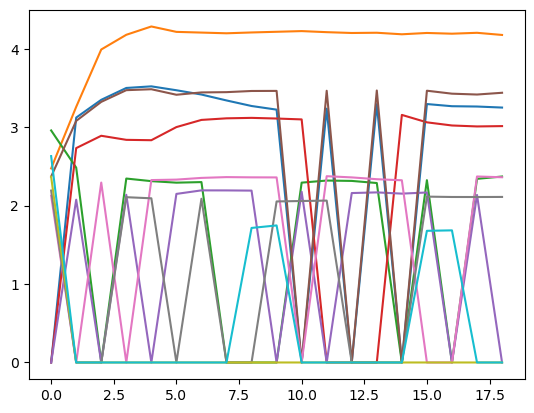

In [34]:
data_path = data_folder + 'GATA3_data.csv'
locs_path = data_folder + 'GATA3_locs.csv'
model_path = model_folder + 'GATA3_model.pth'
# Set parameters
SEQ_LEN = 20
dim_inputs = 10
hidden_size = 100
latent_size = 100
# test
data, locs = read_data(data_path, locs_path, 20, 10)
test_data = data
test_loc = locs
net = Model(dim_inputs, hidden_size, latent_size, SEQ_LEN)
net.load_state_dict(torch.load(model_path))
prediction, generation, trans_status = test(test_data, test_loc, net)
for i in range(10):
    gen = generation[i].view(-1).cpu().detach().numpy()
    status = trans_status[i].view(-1).cpu().detach().numpy()
    plt.plot(status*gen)
plt.show()